In [1]:
print("hello")

hello


In [2]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 7.1 MB/s 


In [3]:
import pyupbit

In [4]:
#SOL 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-SOL", interval="minute60")
df

,open,high,low,close,volume,value
2021-10-23 05:00:00,242850.0,245500.0,241600.0,241600.0,29839.552410,7.263297e+09
2021-10-23 06:00:00,241550.0,242100.0,237500.0,239850.0,64611.376757,1.549430e+10
2021-10-23 07:00:00,239900.0,243800.0,239800.0,242450.0,64093.595435,1.547671e+10
2021-10-23 08:00:00,242450.0,243400.0,240000.0,240700.0,47711.554400,1.152493e+10
2021-10-23 09:00:00,240600.0,245500.0,234800.0,243400.0,197591.364317,4.745678e+10
...,...,...,...,...,...,...
2021-10-31 08:00:00,228900.0,232150.0,227450.0,232000.0,28638.446444,6.563313e+09
2021-10-31 09:00:00,232150.0,233450.0,228800.0,231100.0,46833.006344,1.082088e+10
2021-10-31 10:00:00,231150.0,232600.0,226000.0,226150.0,54401.097834,1.245136e+10
2021-10-31 11:00:00,226150.0,230000.0,225500.0,227800.0,41875.229273,9.541707e+09


In [5]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-10-23 05:00:00,241600.0
1,2021-10-23 06:00:00,239850.0
2,2021-10-23 07:00:00,242450.0
3,2021-10-23 08:00:00,240700.0
4,2021-10-23 09:00:00,243400.0
...,...,...
195,2021-10-31 08:00:00,232000.0
196,2021-10-31 09:00:00,231100.0
197,2021-10-31 10:00:00,226150.0
198,2021-10-31 11:00:00,227800.0


In [6]:
#prophet 불러옴
from fbprophet import Prophet

In [7]:
#학습
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [8]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

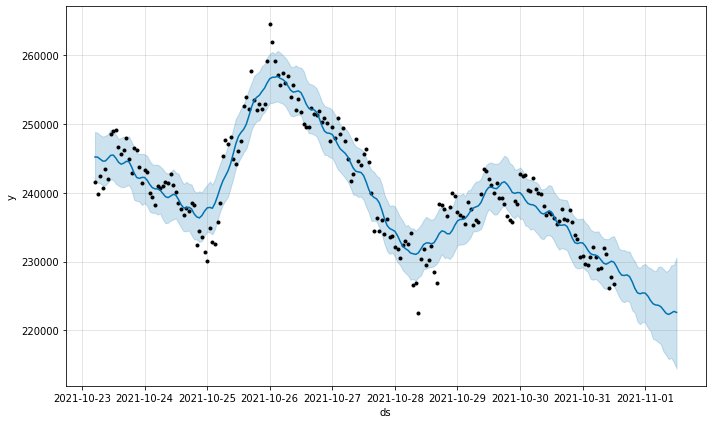

In [9]:
#그래프1
fig1 = model.plot(forecast)

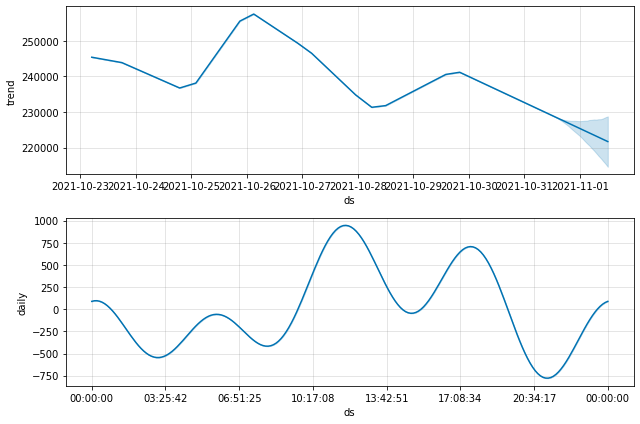

In [10]:
#그래프2
fig2 = model.plot_components(forecast)

In [11]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-SOL")
nowValue

227000.0

In [12]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

222322.3443601942

In [13]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  227000.0
종가의 가격:  222322.3443601942


In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-23 05:00:00,245368.582919,241688.165277,248856.186276,245368.582919,245368.582919,-152.453911,-152.453911,-152.453911,-152.453911,-152.453911,-152.453911,0.0,0.0,0.0,245216.129008
1,2021-10-23 06:00:00,245252.259972,241504.718262,248710.494623,245252.259972,245252.259972,-63.275848,-63.275848,-63.275848,-63.275848,-63.275848,-63.275848,0.0,0.0,0.0,245188.984124
2,2021-10-23 07:00:00,245135.937024,241369.293394,248398.041677,245135.937024,245135.937024,-233.708562,-233.708562,-233.708562,-233.708562,-233.708562,-233.708562,0.0,0.0,0.0,244902.228463
3,2021-10-23 08:00:00,245019.614077,241118.283903,248169.201422,245019.614077,245019.614077,-412.831342,-412.831342,-412.831342,-412.831342,-412.831342,-412.831342,0.0,0.0,0.0,244606.782735
4,2021-10-23 09:00:00,244903.291130,241059.726122,248293.767566,244903.291130,244903.291130,-270.119457,-270.119457,-270.119457,-270.119457,-270.119457,-270.119457,0.0,0.0,0.0,244633.171673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-11-01 08:00:00,222896.546963,216407.570800,228509.707081,217665.392859,227953.768618,-412.831343,-412.831343,-412.831343,-412.831343,-412.831343,-412.831343,0.0,0.0,0.0,222483.715620
220,2021-11-01 09:00:00,222592.463817,215827.590756,228769.489823,216971.796791,227964.047702,-270.119457,-270.119457,-270.119457,-270.119457,-270.119457,-270.119457,0.0,0.0,0.0,222322.344360
221,2021-11-01 10:00:00,222288.380672,215999.845647,229469.549658,216190.764025,228201.879332,238.696842,238.696842,238.696842,238.696842,238.696842,238.696842,0.0,0.0,0.0,222527.077514
222,2021-11-01 11:00:00,221984.297526,215342.517733,229504.133827,215450.073423,228516.471730,779.388251,779.388251,779.388251,779.388251,779.388251,779.388251,0.0,0.0,0.0,222763.685777
